# **Modul 7 - Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**

## **Laporan Praktikum Mata Kuliah Pengolahan Citra dan Visi Komputer oleh:**

### Hanifah Amany

### TI-3E/16

[Link GitHub](https://github.com/hanifahamany/PCVK_Ganjil_2024/tree/main/Week_7_Hanifah)

1.   Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

2.   Berikut merupakan langkah-langkah yang dapat dilakukan:

  a.   Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


b.   Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c.   Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

In [23]:
import numpy as np
import cv2 as cv

def convolution2d(image, kernel, stride, padding):
    # Menambahkan padding pada citra input
    image = np.pad(image, padding, mode='constant', constant_values=0)

    # Mengambil nilai width & height dari kernel dan citra masukan yang sudah ditambahkan pad
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    """
    Menentukan ukuran output dari proses konvolusi menggunakan rumus:
        [(W−K+2P)/S]+1.
    W: ukuran citra input (width / height)
    K: ukuran kernal ((width / height))
    P: nilai padding
    S: nilai stride
    """
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    # Inisialisasi citra hasil konvolusi dengan ukuran yang sesuai
    new_image = np.zeros((output_height, output_width), dtype=np.float32)

    # Proses konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Menghitung nilai konvolusi pada posisi tertentu
            new_image[y, x] = np.sum(
                image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel
            )

    return new_image

d.  Load citra yang akan diproses dan ubah menjadi citra keabuan.

In [24]:
# Membaca gambar dan mengonversi ke grayscale
img = cv.imread('/content/drive/MyDrive/PCVK_2024/img/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

e.   Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

**Kernel Sharpen**

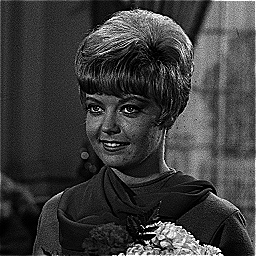

In [25]:
# Kernel sharpening
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Penerapan konvolusi dengan kernel sharpening
output = convolution2d(img_gray, kernel_sharpen, stride=1, padding=1)

cv2_imshow(output)

**Kernel Embos**

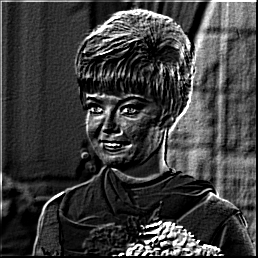

In [26]:
# Kernel emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

**Left Sobel Edge Detection**

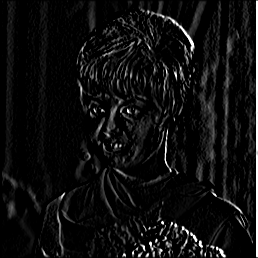

In [27]:
# Left Sobel filter
kernel_sobel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

**Canny Edge Detection**

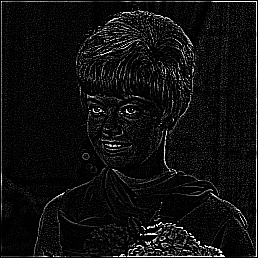

In [28]:
# Canny edge detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))

**Prewitt Filter**

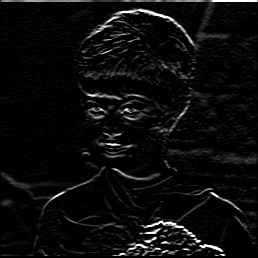

In [29]:
# Prewitt filter
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

**Gaussian Blurr 5x5**

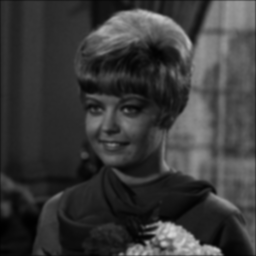

In [30]:
# Gaussian Blur 5x5
kernel_gaussian5 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
cv2_imshow(convolution2d(img_gray, kernel_gaussian5, 1, 2))

**Gaussian Blur 21x21**

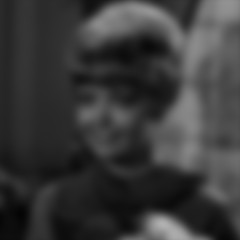

In [31]:
# Gaussian Blur 21x21
kernel_size=21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

**TUGAS**

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

In [32]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

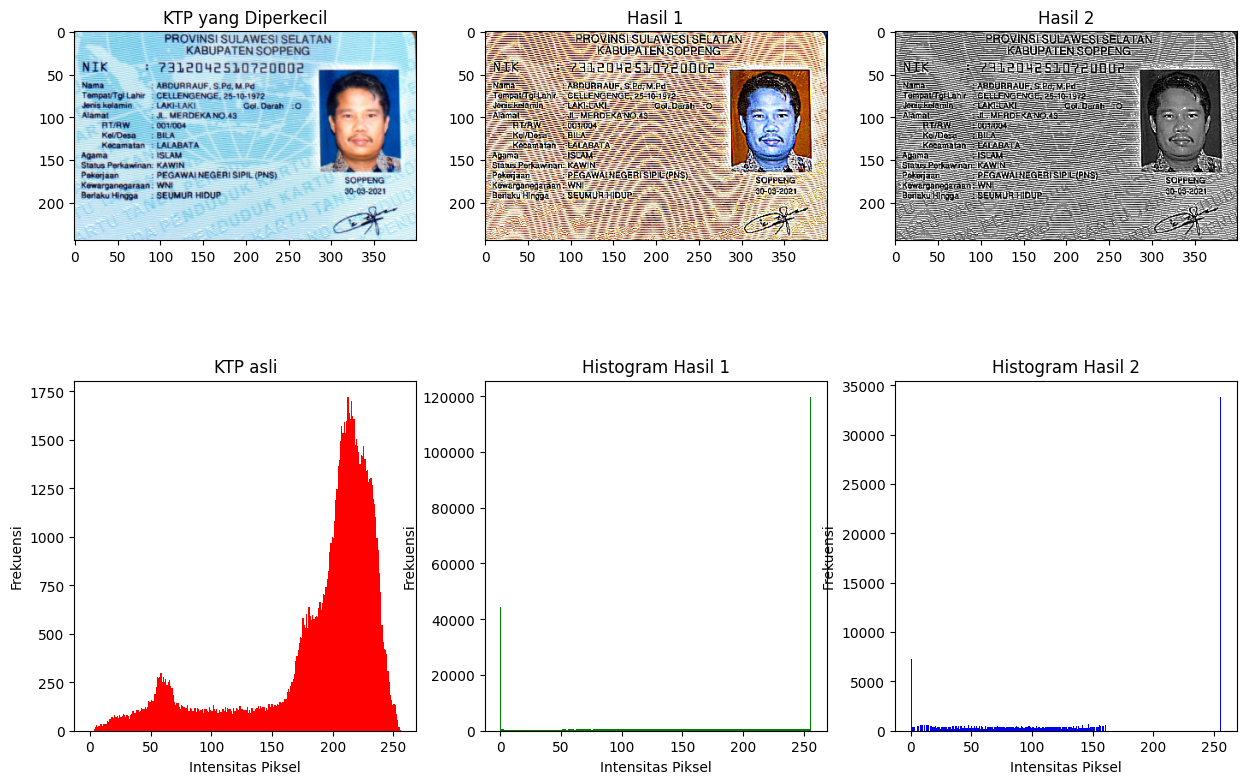

In [33]:
# Memuat gambar
gambar = cv2.imread( '/content/drive/MyDrive/PCVK_2024/Week_3_Hanifah/KTP.jpeg')

# Fungsi untuk sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Fungsi untuk equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Meresize gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Menampilkan histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diberi efek sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Menampilkan histogram gambar yang sudah diberi efek sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menampilkan gambar yang sudah diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Menampilkan histogram gambar yang sudah diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()